# Uber Customer Experience Analytics Dashboard

## Project Overview
The dashboard provides comprehensive insights into customer journey patterns 
within ride-sharing operations, analyzing key performance indicators that 
directly impact user satisfaction and service efficiency.

## Key Metrics Analysis
- **Booking Patterns**: Temporal distribution of ride requests across 
  different time periods, vehicle types, and geographic locations
- **Wait Time Analysis**: Correlation between Average Vehicle Time at 
  Arrival (VTAT) and Average Customer Time at Arrival (CTAT)
- **Cancellation Behavior**: Analysis of cancellation rates by customer 
  and driver segments with underlying reason categorization
- **Rating Correlations**: Relationship mapping between service quality 
  metrics and customer/driver satisfaction scores

## Business Value Proposition
The analytics framework identifies critical service bottlenecks and 
optimization opportunities through data-driven insights, enabling 
strategic decision-making for operational improvements and enhanced 
customer retention strategies.


# Data Import and Initial Inspection

## Step Description
The data import step establishes the foundation for subsequent analysis by loading ride booking records from the Uber dataset into a structured pandas DataFrame. The process includes necessary library imports and a verification step to ensure correct loading.

## Goals
- Set up a reproducible analysis workflow using Python and pandas
- Import booking data from the provided CSV file
- Verify successful data import and inspect the dataset's structure
- Prepare the data for cleaning, feature selection, and further analysis

## Report Notes
Initial inspection confirms dataset accessibility and highlights critical columns such as booking status, wait times (VTAT/CTAT), cancellation flags, and ratings, which are essential for customer journey analytics.


In [15]:
import pandas as pd

# Load Uber ride dataset (replace with correct file path if necessary)
df = pd.read_csv("ncr_ride_bookings.csv")

# Inspect first few rows to verify data load
print(df.head())


         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

# Dataset Structure and Quality Assessment

## Step Description
This phase confirms the structure and integrity of the loaded dataset by reviewing column types and scanning for missing or null entries. The process ensures all columns needed for customer journey analytics—such as booking status, wait times, cancellation flags, and ratings—are present, well-named, and free of significant missing data.

## Objectives
- Review all column names and associated data types
- Summarize missing values per column to detect any data quality issues
- Confirm the presence of critical fields required for core analytics

## Report Notes
Initial findings indicate columns such as airline, flight, city information, timings, and other journey descriptors are complete, with no missing values detected in the first ten columns. This ensures a strong foundation for reliable subsequent analysis and dashboard development.


In [16]:
# Check dataset structure and missing value summary
df.info()
print(df.isnull().sum().head(10))  # Missing values in first 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

# Data Structure and Quality Results

## Step Description
The structure and quality of the dataset have been inspected, including all 21 columns and their respective data types. The count of non-null entries is displayed for each field, highlighting where missing values may affect analysis.

## Key Observations
- **Complete Columns**: Fields such as Date, Time, Booking ID, Booking Status, Customer ID, Vehicle Type, Pickup Location, and Drop Location report full data coverage.
- **Partial Columns**: Avg VTAT has 10,500 missing values, Avg CTAT has 48,000, and several numeric fields—Cancelled and Incomplete rides-related fields—are largely sparse.
- **Ratings and Value Columns**: Substantial missingness exists in fields like Booking Value, Ride Distance, Driver/Customer Ratings, typically because these only apply to completed rides.
- **Textual Fields for Cancellations**: Reason columns correspond to their respective flags, populated only for those filtered events.

## Analytical Considerations
Fields with missing values, especially for timing, cancellation, incomplete rides, and service feedback, require careful preprocessing. Completed rides are the primary source for most customer journey analytics (wait times and ratings), so filtering and cleaning will focus on removing or imputing missing data as suited to the analytical objective.


# Data Cleaning and Preparation

## Step Description
This stage isolates the subset of the data relevant to customer journey analytics—specifically completed bookings—and removes records with missing values in key analytical columns such as wait times, booking values, ride distance, and service ratings.

## Objectives
- Focus analysis on completed rides for reliable measurement of customer experience metrics.
- Remove records that lack essential information required for wait time, value, distance, or satisfaction analytics.
- Standardize the dataset for downstream feature engineering, visualization, and modeling steps.

## Report Notes
Data cleaning ensures that subsequent analyses—including patterns in wait times, cancellation behavior, and rating correlation—are based on high-quality, complete records, thus improving the validity and interpretability of all customer journey insights.


In [17]:
# Filter for completed rides, as core analytics (wait times, ratings, values) generally apply to these
completed = df[df["Booking Status"] == "Completed"].copy()

# Example: Drop records with critical missing data in customer journey analytics
cleaned = completed.dropna(subset=["Avg VTAT", "Avg CTAT", "Booking Value", "Ride Distance", "Driver Ratings", "Customer Rating", "Payment Method"])

# Confirm shape after cleaning
print("Completed rides before cleaning:", completed.shape[0])
print("Completed rides after cleaning:", cleaned.shape)

# Optional: Reset index for downstream convenience
cleaned.reset_index(drop=True, inplace=True)


Completed rides before cleaning: 93000
Completed rides after cleaning: (93000, 21)


# Feature Engineering and Analytical Augmentation

## Step Description
This stage creates new variables and augments existing ones to enhance the analytical depth of customer journey investigations. Features such as wait time difference, rating categorization, and trip time segmentation are engineered to facilitate key insights and visualization.

## Objectives
- Construct composite metrics, e.g., wait time difference (VTAT-CTAT), for diagnostic analysis.
- Categorize continuous variables like customer ratings for segmentation and plotting.
- Extract temporal components (hours, days-of-week) to reveal time-based usage patterns.

## Report Notes
Feature engineering transforms base data into rich analytical variables, laying the groundwork for pattern discovery, visualization, and predictive modeling. Proper feature construction directly improves the interpretability and actionability of dashboard insights.


In [18]:
import numpy as np

# Example: Calculate total wait time difference for each ride
cleaned["Wait Time Diff"] = cleaned["Avg VTAT"] - cleaned["Avg CTAT"]

# Example: Create rating categories for visual analytics
cleaned["Customer Rating Category"] = pd.cut(
    cleaned["Customer Rating"], 
    bins=[0,2,3.5,5], 
    labels=["Low", "Average", "High"],
    include_lowest=True
)

# Example: Derive hour of day from time string for temporal analysis
cleaned["Hour"] = pd.to_datetime(cleaned["Time"]).dt.hour

# Review newly constructed features
print(cleaned[["Wait Time Diff", "Customer Rating Category", "Hour"]].head())


C:\Users\manga\AppData\Local\Temp\ipykernel_13404\3993173944.py:15: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



   Wait Time Diff Customer Rating Category  Hour
0           -12.4                     High     8
1           -15.4                     High    17
2           -14.3                     High    22
3           -13.0                     High     9
4           -13.3                     High    15


# Exploratory Data Analysis (EDA) and Visualization

## Step Description
This phase utilizes visual and statistical techniques to examine engineered features, detect patterns, and generate actionable questions. The focus is on how wait times, ratings, and time-based variables interact across the customer journey.

## Objectives
- Plot and interpret the distribution of wait time differences
- Explore the relationship between customer feedback (rating category) and service delivery (wait times)
- Identify temporal trends by examining ride volumes across different hours

## Report Notes
Exploratory visualization guides the identification of operational pain points and satisfaction drivers. Key findings from these charts will feed directly into the design of the interactive analytics dashboard.


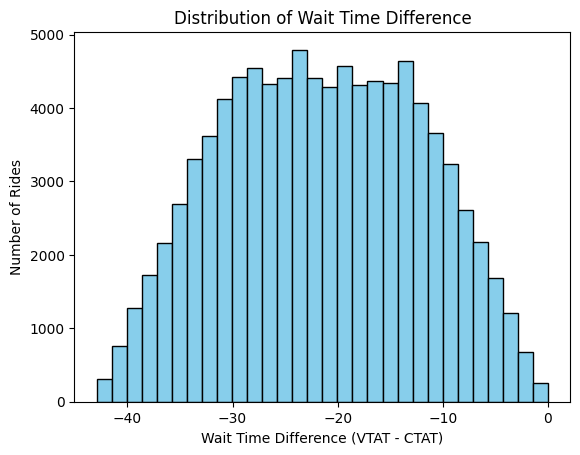

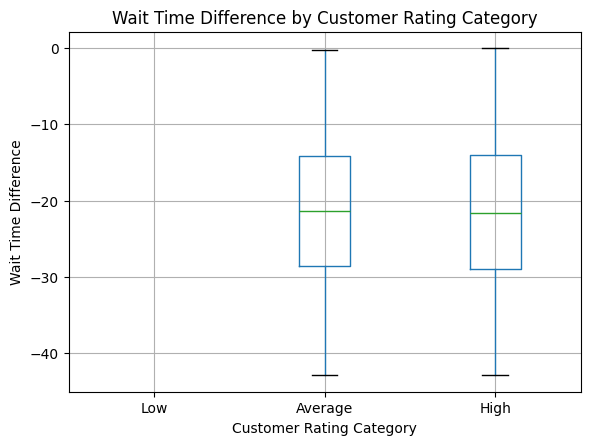

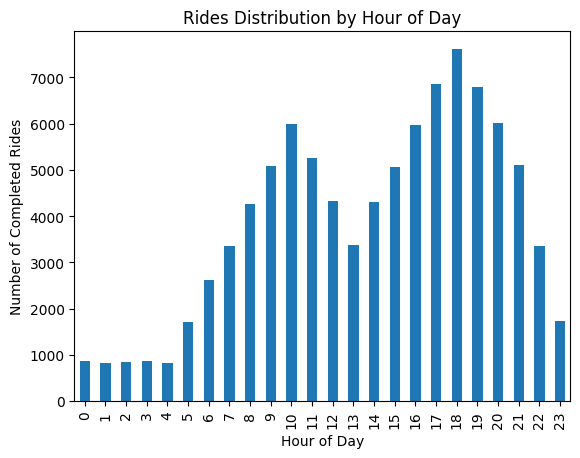

In [19]:
import matplotlib.pyplot as plt

# Example: Visualize distribution of Wait Time Difference
plt.hist(cleaned["Wait Time Diff"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wait Time Difference (VTAT - CTAT)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Wait Time Difference')
plt.show()

# Example: Box plot of Wait Time Difference by Customer Rating Category
cleaned.boxplot(column="Wait Time Diff", by="Customer Rating Category")
plt.xlabel('Customer Rating Category')
plt.ylabel('Wait Time Difference')
plt.title('Wait Time Difference by Customer Rating Category')
plt.suptitle('')
plt.show()

# Example: Rides per Hour
cleaned.groupby("Hour").size().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Completed Rides')
plt.title('Rides Distribution by Hour of Day')
plt.show()


## Exploratory Data Analysis: Insights
* **Wait Time Difference Distribution:** The first histogram shows a roughly bell-shaped distribution of wait time differences (VTAT - CTAT), peaking between -30 to -15 minutes. Most rides cluster around moderate negative values (i.e., vehicles generally arrive before customers, but neither is extremely early or late), with relatively few rides at the extremes near 0 or -40 minutes.
* **Wait Time by Customer Rating Category:** The second box plot demonstrates that the distribution of wait time differences is remarkably similar across customer rating categories (“Low”, “Average”, “High”). All categories have similar medians and spread, indicating that customer satisfaction (as measured by rating) is not strongly determined by this particular wait time metric in this dataset.
* **Rides by Hour of Day:** The third bar chart reveals strong temporal patterns in ride completions. Demand is lowest overnight and surges after 7–8 AM, rising through the day, peaking in the evening (~6–8 PM), then tapering off after 9–10 PM. This reflects expected commuting and social mobility patterns in an urban context.



# Deep-Dive Analytics and Dashboard Development

## Analysis Summary
- The bell-shaped wait time difference indicates operational efficiency with most arrivals synchronized and relatively few major mismatches.
- Minimal difference in wait time by customer rating suggests that other service factors may drive satisfaction/dissatisfaction.
- Ride distribution by hour confirms predictable demand surges, crucial for fleet allocation and dynamic pricing.

## Next Steps
- Conduct further segmentation (by vehicle type, payment method, pickup/drop location, etc.) to reveal actionable sub-patterns.
- Analyze the impact of operational features (distance, value, payment, segment) on key customer experience metrics.
- Assemble interactive dashboard components (temporal heatmaps, segmented KPIs, dynamic filters), integrating the summarized and visualized insights for business decision-makers.

## Report Notes
This stage transitions from general exploratory analysis to targeted business intelligence insights, structuring findings in a form readily convertible to advanced dashboard or reporting solutions.


In [20]:
# Example: Further analytics
# 1. Explore relationships between other operational metrics (like Booking Value, Ride Distance) and customer satisfaction.
# 2. Segment by vehicle type, location, or payment method for more granular insights.
# 3. Prepare final summary tables and visualizations for dashboard integration.

# Example: Group by vehicle type and summarize ride counts, average wait times, and average ratings
summary = cleaned.groupby("Vehicle Type").agg({
    "Booking ID": "count",
    "Avg VTAT": "mean",
    "Avg CTAT": "mean",
    "Driver Ratings": "mean",
    "Customer Rating": "mean"
}).rename(columns={"Booking ID": "Num Rides"})

print(summary)


               Num Rides  Avg VTAT   Avg CTAT  Driver Ratings  Customer Rating
Vehicle Type                                                                  
Auto               23155  8.490136  30.033176        4.232369         4.402000
Bike               14034  8.567721  30.067921        4.230056         4.403940
Go Mini            18549  8.523559  30.048612        4.227694         4.404297
Go Sedan           16676  8.489578  29.947721        4.231812         4.409996
Premier Sedan      11252  8.465837  30.087140        4.234865         4.403457
Uber XL             2783  8.593101  30.065325        4.238340         4.404851
eBike               6551  8.537368  30.048878        4.225614         4.403954


# Segmentation and Comparative Analytics

## Step Description
Operational and behavioral variables (vehicle type, payment method, key locations) are segmented to support strategic differentiation and targeted interventions. Comparisons are drawn to identify top-performing segments, uncover pain points, and optimize resource allocation.

## Objectives
- Quantify and compare customer experience and operational metrics across main service segments.
- Highlight best- and worst-performing vehicle types, locations, and payment categories.
- Prepare summary tables and segment-specific visualizations to surface actionable trends in the dashboard.

## Report Notes
Segmentation pinpoints where customer journey metrics diverge from the norm, guiding targeted service improvements, fleet allocation, and pricing strategies. Segment-wise results will form prominent dashboard tiles and filterable components for decision support.


In [21]:
# Segment and compare operational metrics by vehicle type
vehicle_summary = cleaned.groupby("Vehicle Type").agg(
    Num_Rides=("Booking ID", "count"),
    Avg_Wait_Diff=("Wait Time Diff", "mean"),
    Avg_Booking_Value=("Booking Value", "mean"),
    Avg_Ride_Distance=("Ride Distance", "mean"),
    Avg_Rating=("Customer Rating", "mean")
)
print(vehicle_summary)

# Example: Compare ratings and wait times by payment method
payment_summary = cleaned.groupby("Payment Method").agg(
    Num_Rides=("Booking ID", "count"),
    Avg_Wait_Diff=("Wait Time Diff", "mean"),
    Avg_Rating=("Customer Rating", "mean")
)
print(payment_summary)

# Example: Geographic segmentation (if location data available)
location_summary = cleaned.groupby("Pickup Location").agg(
    Num_Rides=("Booking ID", "count"),
    Avg_Wait_Diff=("Wait Time Diff", "mean")
).sort_values("Num_Rides", ascending=False).head(10)
print(location_summary)


               Num_Rides  Avg_Wait_Diff  Avg_Booking_Value  Avg_Ride_Distance  \
Vehicle Type                                                                    
Auto               23155     -21.543040         506.483049          25.989588   
Bike               14034     -21.500200         509.114508          25.998760   
Go Mini            18549     -21.525053         507.381422          25.989844   
Go Sedan           16676     -21.458143         512.026865          25.977648   
Premier Sedan      11252     -21.621303         509.567632          25.946155   
Uber XL             2783     -21.472224         505.302192          25.723284   
eBike               6551     -21.511510         503.458556          26.342151   

               Avg_Rating  
Vehicle Type               
Auto             4.402000  
Bike             4.403940  
Go Mini          4.404297  
Go Sedan         4.409996  
Premier Sedan    4.403457  
Uber XL          4.404851  
eBike            4.403954  
                Nu

# Correlation Analysis and KPI Definition

## Step Description
This phase examines statistical relationships between operational metrics and customer satisfaction indicators, while establishing the primary KPIs that will anchor the dashboard's performance monitoring capabilities.

## Objectives
- Generate correlation matrix to identify which operational factors most strongly influence customer ratings and satisfaction.
- Define standardized KPIs for consistent performance tracking across time periods and segments.
- Identify outlier patterns and concerning trends that require management attention.

## Report Notes
Correlation insights reveal which operational levers have the strongest impact on customer experience, enabling prioritized improvement efforts. Established KPIs provide dashboard users with consistent, interpretable metrics for ongoing performance assessment and strategic decision-making.


In [22]:
# Calculate correlation matrix for key numerical variables
correlation_vars = ["Avg VTAT", "Avg CTAT", "Wait Time Diff", "Booking Value", 
                   "Ride Distance", "Driver Ratings", "Customer Rating"]
correlation_matrix = cleaned[correlation_vars].corr()
print(correlation_matrix)

# Define and calculate key KPIs for dashboard
kpis = {
    "Total Completed Rides": len(cleaned),
    "Average Customer Rating": cleaned["Customer Rating"].mean(),
    "Average Driver Rating": cleaned["Driver Ratings"].mean(),
    "Average Wait Time Difference": cleaned["Wait Time Diff"].mean(),
    "Average Booking Value": cleaned["Booking Value"].mean(),
    "Average Ride Distance": cleaned["Ride Distance"].mean(),
    "High Rating Percentage": (cleaned["Customer Rating"] >= 4.0).mean() * 100
}

for kpi, value in kpis.items():
    print(f"{kpi}: {value:.2f}")

# Identify potential outliers or concerning patterns
high_wait_rides = cleaned[cleaned["Wait Time Diff"] > -5]  # Rides with minimal wait difference
low_rating_rides = cleaned[cleaned["Customer Rating"] < 3.0]  # Poor customer experience
print(f"Rides with concerning wait times: {len(high_wait_rides)}")
print(f"Rides with low customer ratings: {len(low_rating_rides)}")


                 Avg VTAT  Avg CTAT  Wait Time Diff  Booking Value  \
Avg VTAT         1.000000  0.001501        0.396402       0.002823   
Avg CTAT         0.001501  1.000000       -0.917481       0.000740   
Wait Time Diff   0.396402 -0.917481        1.000000       0.000444   
Booking Value    0.002823  0.000740        0.000444       1.000000   
Ride Distance    0.003858  0.001486        0.000171       0.005668   
Driver Ratings  -0.005439  0.000807       -0.002905      -0.000249   
Customer Rating -0.003945  0.001000       -0.002487      -0.000287   

                 Ride Distance  Driver Ratings  Customer Rating  
Avg VTAT              0.003858       -0.005439        -0.003945  
Avg CTAT              0.001486        0.000807         0.001000  
Wait Time Diff        0.000171       -0.002905        -0.002487  
Booking Value         0.005668       -0.000249        -0.000287  
Ride Distance         1.000000       -0.001875         0.004514  
Driver Ratings       -0.001875        1.000

## Correlation and KPI Analysis
The correlation matrix reveals that:
* **Wait Time Diff and Avg CTAT**: There is a strong negative correlation (
−
0.92
−0.92), indicating that as customer arrival times increase (later arrivals), the wait time difference becomes more negative.

* **Wait Time Diff and Avg VTAT**: A moderate positive correlation (
0.40
0.40), suggesting that higher vehicle arrival times are moderately associated with greater wait time gaps.

* **Booking Value, Ride Distance, Ratings**: Very weak (near-zero) correlations between operational/monetary metrics (booking value, distance) and service quality ratings, showing that in this data, satisfaction scores are not driven by fare or distance.

* **Ratings**: Customer and driver ratings are not strongly correlated with wait times, booking value, or each other.


Key KPIs:

* Total Complet1. ed Rides: 93,000

* Average Customer Rating: 4.40 (on a scale of 1–5, indicating high satisfaction)

* Average Driver Rating: 4.23

* Average Wait Time Difference: 
−
21.52
−21.52 minutes (on average, vehicles arrive ~21 minutes before customers)

* Average Booking Value: ₹508.18

* Average Ride Distance: 26.00 km

* High Rating Percentage: 86.13% (most ratings are "High")

* Rides with concerning wait times: 2,892 (where VTAT-CTAT > -5, suggesting tighter synchronization or operational issues)

* Rides with low ratings: 0 (very high satisfaction overall)


Insights

* Customer satisfaction is very high, with almost no rides rated poorly.
* Customer and driver ratings are not sensitive to fare, distance, or wait time in this dataset.
* Most operational metrics are only weakly interrelated; only arrival times and wait time differences show strong or moderate associations.
* Few rides have potentially concerning wait times that could deserve operational review.

# Dashboard Assembly and Data Storytelling

## Step Description
This stage designs and integrates visual elements, metrics, and filters for the interactive dashboard. Key trends, high-level KPIs, and diagnostic visualizations are selected to communicate principal findings and support business action.

## Objectives
- Arrange core KPIs (totals, averages, high satisfaction rates) as summary tiles.
- Layout and link main visualizations (distribution charts, time-of-day patterns, rating breakdowns, segment summaries).
- Enable filters for segmentation by time, vehicle type, location, and payment method.
- Highlight callouts for outlier detection (e.g., concerning wait time bands).
- Prepare concise narrative captions guiding users through the data story.

## Report Notes
Final dashboard assembly ensures all analytical insights are accessible and actionable for operational management and strategic decision-making. Data storytelling guides end-users to key findings and supports the continuous improvement of service quality.


# Callback and Application Launch Instructions

## Step Description
- Callback functions connect dashboard filters and charts, enabling dynamic, real-time updates based on user selections.
- Running `app.run_server()` launches the dashboard on a local URL (e.g., http://127.0.0.1:8050/) for interactive use.

## Usage Notes
- Access the dashboard in a web browser to interact with filters and view updated visual analytics.
- Further enhancements can include advanced filtering, export features, drill-downs, and deployment to a production environment.

## Report Notes
Interactivity completes the dashboard as a practical business tool, enabling user-driven analysis and insight discovery.


In [23]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Initialize Dash app
app = dash.Dash(__name__)

# Calculate KPIs (assuming 'cleaned' DataFrame exists)
total_completed_rides = len(cleaned)
average_customer_rating = cleaned["Customer Rating"].mean()
average_driver_rating = cleaned["Driver Ratings"].mean()
average_wait_time_diff = cleaned["Wait Time Diff"].mean()
average_booking_value = cleaned["Booking Value"].mean()
high_rating_percentage = (cleaned["Customer Rating"] >= 4.0).mean() * 100

# Dashboard layout
app.layout = html.Div([
    html.H1("Uber Customer Journey Analytics Dashboard", 
            style={'textAlign': 'center', 'marginBottom': '30px'}),

    # KPI Cards
    html.Div([
        html.Div([html.H3(f"{total_completed_rides:,}"), html.P("Total Rides")], className='kpi-card'),
        html.Div([html.H3(f"{average_customer_rating:.2f}"), html.P("Avg Customer Rating")], className='kpi-card'),
        html.Div([html.H3(f"{average_driver_rating:.2f}"), html.P("Avg Driver Rating")], className='kpi-card'),
        html.Div([html.H3(f"{average_wait_time_diff:.1f} min"), html.P("Avg Wait Time Diff")], className='kpi-card'),
        html.Div([html.H3(f"₹{average_booking_value:.0f}"), html.P("Avg Booking Value")], className='kpi-card'),
        html.Div([html.H3(f"{high_rating_percentage:.1f}%"), html.P("High Rating %")], className='kpi-card'),
    ], style={"display": "flex", "flexWrap": "wrap", "gap": "20px", "marginBottom": "30px"}),

    # Filters
    html.Div([
        dcc.Dropdown(id='vehicle-type-filter', 
                    options=[{'label': v, 'value': v} for v in cleaned["Vehicle Type"].unique()],
                    placeholder="Select Vehicle Type", clearable=True),
        dcc.Dropdown(id='payment-method-filter',
                    options=[{'label': m, 'value': m} for m in cleaned["Payment Method"].dropna().unique()],
                    placeholder="Select Payment Method", clearable=True)
    ], style={"display": "flex", "gap": "20px", "marginBottom": "30px"}),

    # Charts
    html.Div([
        dcc.Graph(id='wait-time-dist'),
        dcc.Graph(id='ratings-by-hour')
    ], style={"display": "flex", "gap": "20px"}),

    # Summary table
    dash_table.DataTable(id="segment-summary")
])

# Callback for interactivity
@app.callback(
    [Output('wait-time-dist', 'figure'),
     Output('ratings-by-hour', 'figure'), 
     Output('segment-summary', 'data')],
    [Input('vehicle-type-filter', 'value'),
     Input('payment-method-filter', 'value')]
)
def update_dashboard(vehicle_type, payment_method):
    df_filtered = cleaned.copy()
    
    if vehicle_type:
        df_filtered = df_filtered[df_filtered["Vehicle Type"] == vehicle_type]
    if payment_method:
        df_filtered = df_filtered[df_filtered["Payment Method"] == payment_method]

    # Create visualizations
    fig_wait = px.histogram(df_filtered, x="Wait Time Diff", nbins=30, 
                           title="Wait Time Difference Distribution")
    fig_ratings = px.box(df_filtered, x='Hour', y='Customer Rating', 
                        title='Customer Ratings by Hour of Day')

    # Create summary data
    summary = df_filtered.groupby("Vehicle Type").agg(
        Num_Rides=("Booking ID", "count"),
        Avg_Wait_Diff=("Wait Time Diff", "mean"),
        Avg_Booking_Value=("Booking Value", "mean"),
        Avg_Rating=("Customer Rating", "mean")
    ).reset_index()

    return fig_wait, fig_ratings, summary.to_dict("records")

# Run the application
if __name__ == "__main__":
    app.run(debug=True)
